# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 21.09.2020

Мягкий дедлайн: 02:59MSK 05.10.2020

Жесткий дедлайн: 23:59MSK 08.10.2020

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [4]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*: 
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [8]:
data = pd.read_csv('train.csv')
data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1226152,id3780900,1,2016-04-03 20:10:45,2016-04-03 20:17:33,1,-73.986618,40.687675,-73.985168,40.703121,N,408
421403,id0643179,2,2016-05-06 20:27:55,2016-05-06 20:49:17,1,-73.987083,40.761929,-73.950592,40.822300,N,1282
308398,id0763998,1,2016-05-28 11:30:27,2016-05-28 11:38:45,1,-73.958916,40.764175,-73.971489,40.764118,N,498
1207156,id0527787,1,2016-02-13 16:55:41,2016-02-13 17:05:56,2,-73.991211,40.764492,-73.979347,40.755314,N,615
1317775,id1580868,2,2016-02-19 05:57:42,2016-02-19 06:02:26,1,-73.944984,40.777664,-73.933472,40.795036,N,284


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = data.drop("dropoff_datetime", axis=1)

In [10]:
data["pickup_datetime"] = pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
data_initial = data.copy()

data.dtypes

# Source: https://stackoverflow.com/a/26763793/14101402 

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Посмотрим на распределение сэмлов разного размера по таргету

[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Длительность поездки'),
 Text(0.5, 1.0, 'Длительность поездок, семпл=100')]

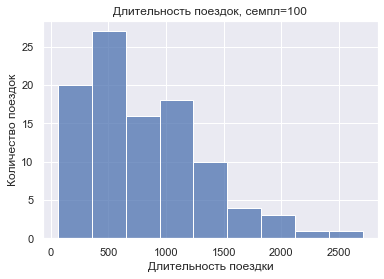

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n = 100
trip_duration_column = data['trip_duration'].sample(n)
gr = sns.histplot(data=trip_duration_column)
gr.set(xlabel='Длительность поездки', ylabel='Количество поездок', title="Длительность поездок, семпл=" + str(n))

[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Длительность поездки'),
 Text(0.5, 1.0, 'Длительность поездок, семпл=10000')]

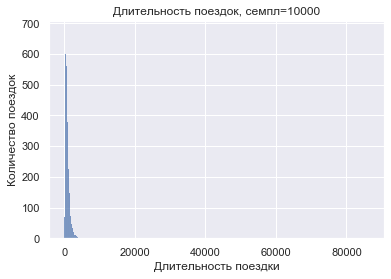

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n = 10000
trip_duration_column = data['trip_duration'].sample(n)
gr = sns.histplot(data=trip_duration_column)
gr.set(xlabel='Длительность поездки', ylabel='Количество поездок', title="Длительность поездок, семпл=" + str(n))

И распределение по всей выборке:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Длительность поездки'),
 Text(0.5, 1.0, 'Длительность поездок, распределение')]

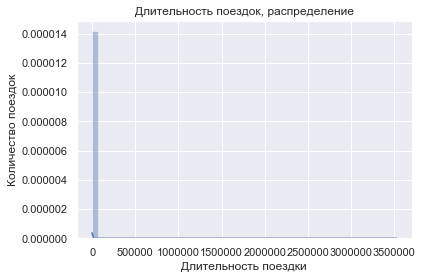

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
trip_duration_column = data['trip_duration']
gr = sns.distplot(trip_duration_column)
gr.set(xlabel='Длительность поездки', ylabel='Количество поездок', title="Длительность поездок, распределение")

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** большое количество значений таргета располагаются в промежутке до 3000, при этом есть довольно большое количество выбросов, значение которых кратно больше этого множества

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Вероятнее всего, многчисленные выбросы, которые проявились на предыдущем шаге, несут в себе определенную значимость, поэтому от них избавляться нельзя, но при этом известно, что модели, штрафуемые по RMSE, не очень хорошо ведут на таких разнородных выборках. Использование логарифмической ошибки позволяет уменьшить разрыв между основной группой наблюдений и выбросами, что, скорее всего, позволит модели быть более корректной.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Формула обычного MSE
$$\text{MSE}(X, y, a) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(y_i - (a(x_i)\big)^2$$
Формула MSE для $\hat{a}$ и $\hat{y}_i$
$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - (\hat{a}(x_i)\big)^2$$

Подставим  $\hat{y}_i = \log{(y_i + 1)}$ и $\hat{a}(x_i) = \log{(a(x_i) + 1)}$
$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - (\log{(a(x_i) + 1)}\big)^2$$

Формула RMSLE
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

Получаем:
$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} \equiv \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - (\log{(a(x_i) + 1)}\big)^2$$

Cледовательно
$$\text{RMSLE}(X, y, a) \equiv \text{MSE}(X, \hat{y}, \hat{a})$$ 
ч.т.д

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Логарифм длительность поездки'),
 Text(0.5, 1.0, 'Логарифм длительности поездок, распределение')]

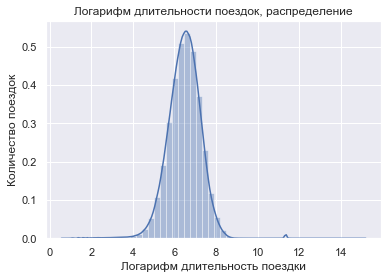

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['trip_duration_log'] = np.log1p(data['trip_duration'])
trip_duration_column = data['trip_duration_log']
gr = sns.distplot(trip_duration_column)
gr.set(xlabel='Логарифм длительность поездки', ylabel='Количество поездок', title="Логарифм длительности поездок, распределение")

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Рассмотрим в качестве константного предсказания среднее значение:

In [15]:
constant = data['trip_duration_log'].mean()

In [16]:
from sklearn.metrics import mean_squared_error

constant_prediction = constant * np.ones(data.shape[0])
constant_prediction.shape
rmsle = np.sqrt(mean_squared_error(data['trip_duration_log'], constant_prediction))
print("Ошибка при константном предсказании: " + str(rmsle))

Ошибка при константном предсказании: 0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.dtypes
data.loc[: , "pickup_date"] = data["pickup_datetime"].dt.date
fig, ax = plt.subplots(figsize=(300, 100))
ax = sns.countplot(x=data['pickup_date'].sort_values(), data=data)
ax
# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.



**Ответ:** исходя из графика, два аномальных периода: 2016-01-23 и 2016-05-30

23 января 2016 года в Нью-Йорке произошел сильнейший снегопад: "..в Нью-Йорке и Вашингтоне остановлено движение общественного транспорта, не работают аэропорты и предприятия, жизнь в городах практически замерла"
source: https://www.bbc.com/russian/international/2016/01/160124_snowstorm_us_sunday

30 мая 2016 года отмечался Memorial Day. Возможно, большинство жителей Нью-Йорка сидели дома и почитали память ветеранов (или просто таксисты не выходили на работу):
source: https://en.wikipedia.org/wiki/Memorial_Day

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Text(0.5, 0.98, 'Зависимость количества поездок от дня недели')

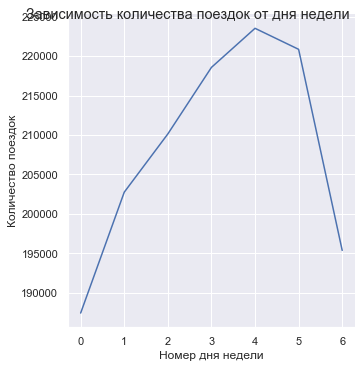

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['day_of_week']= data['pickup_datetime'].dt.day_name()
data['day_of_week_num']= data['pickup_datetime'].dt.weekday
data['month'] = data['pickup_datetime'].dt.month_name()
days_groups = data.groupby("day_of_week_num").size().reset_index(name="rides")
days_groups
gr = sns.relplot(data=days_groups, x='day_of_week_num', y='rides', kind="line").set_axis_labels("Номер дня недели","Количество поездок")
gr.fig.suptitle("Зависимость количества поездок от дня недели")

Text(0.5, 0.98, 'Зависимость количества поездок от часа')

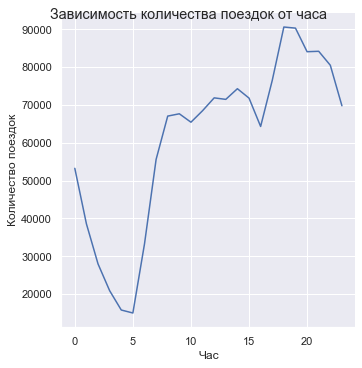

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['hour']= data['pickup_datetime'].dt.hour
days_groups = data.groupby("hour").size().reset_index(name="rides")
days_groups
gr = sns.relplot(data=days_groups, x='hour', y='rides', kind="line").set_axis_labels("Час","Количество поездок")
gr.fig.suptitle("Зависимость количества поездок от часа")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

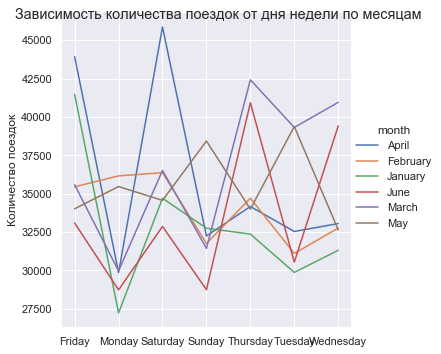

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
days_groups = data.groupby(by = ['day_of_week','month']).size().reset_index(name="rides")
gr = sns.relplot(data=days_groups, x='day_of_week', y='rides', hue='month', kind="line").set_axis_labels("","Количество поездок")
gr.fig.suptitle("Зависимость количества поездок от дня недели по месяцам")
gr

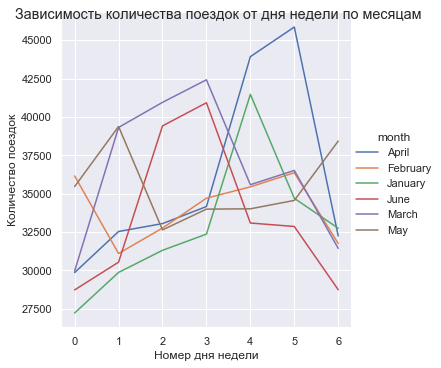

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
days_groups = data.groupby(by = ['day_of_week_num','month']).size().reset_index(name="rides")
gr = sns.relplot(data=days_groups, x='day_of_week_num', y='rides', hue='month', kind="line").set_axis_labels("Номер дня недели","Количество поездок")
gr.fig.suptitle("Зависимость количества поездок от дня недели по месяцам")
gr

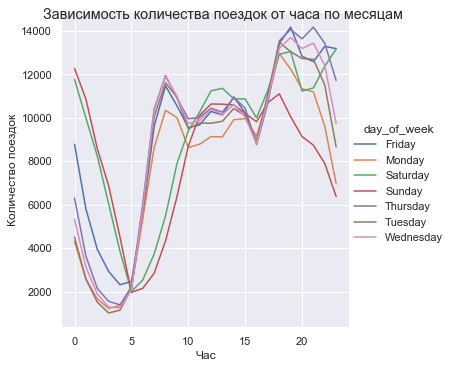

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
hours_groups = data.groupby(by = ['hour','day_of_week']).size().reset_index(name="rides")
gr = sns.relplot(data=hours_groups, x='hour', y='rides', hue='day_of_week', kind="line").set_axis_labels("Час", "Количество поездок")
gr.fig.suptitle("Зависимость количества поездок от часа по месяцам")
gr

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ:** По первому графику видно, что по количеству поездок достаточно сильно выделаеется суббота апреля. С чем это связано? Не очень понятною
По второму графику очевидно, что утренний рост заказов для будних дней наступает раньше, чем для выходных, ведь большинству людей с утра в выходные не надо ехать на работу. Кроме того, в воскресенье вечером люди отдыхают перед рабочей неделей, поэтому сидят дома и никуда не едут.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=3)
print("Количество наблюдений в обучающей выборке: " + str(train.shape[0]))
print("Количество наблюдений в тестовой выборке: " + str(test.shape[0]))

Количество наблюдений в обучающей выборке: 1021050
Количество наблюдений в тестовой выборке: 437594


Text(0.5, 0.98, 'Зависимость логарифма средней длительности поездки от дня недели')

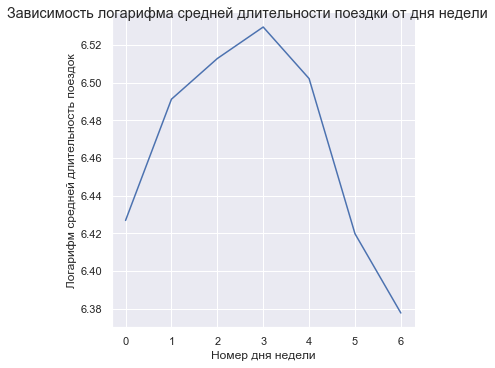

In [23]:
data = train
data['day_of_week_num']= data['pickup_datetime'].dt.weekday
days_group = data.groupby("day_of_week_num").mean()["trip_duration_log"]
days_group
gr = sns.relplot(data=days_group, kind="line").set_axis_labels("Номер дня недели", "Логарифм средней длительность поездок")
gr.fig.suptitle("Зависимость логарифма средней длительности поездки от дня недели")

Text(0.5, 0.98, 'Зависимость логарифма средней длительности поездки от часа')

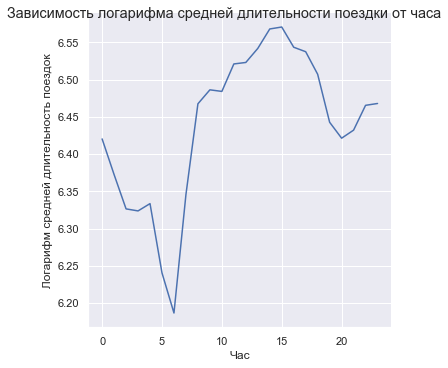

In [24]:
hours_group = data.groupby("hour").mean()["trip_duration_log"]
hours_group
gr = sns.relplot(data=hours_group, kind="line").set_axis_labels("Час", "Логарифм средней длительность поездок")
gr.fig.suptitle("Зависимость логарифма средней длительности поездки от часа")

Text(0.5, 0.98, 'Зависимость логарифма средней длительности поездки от часа недели')

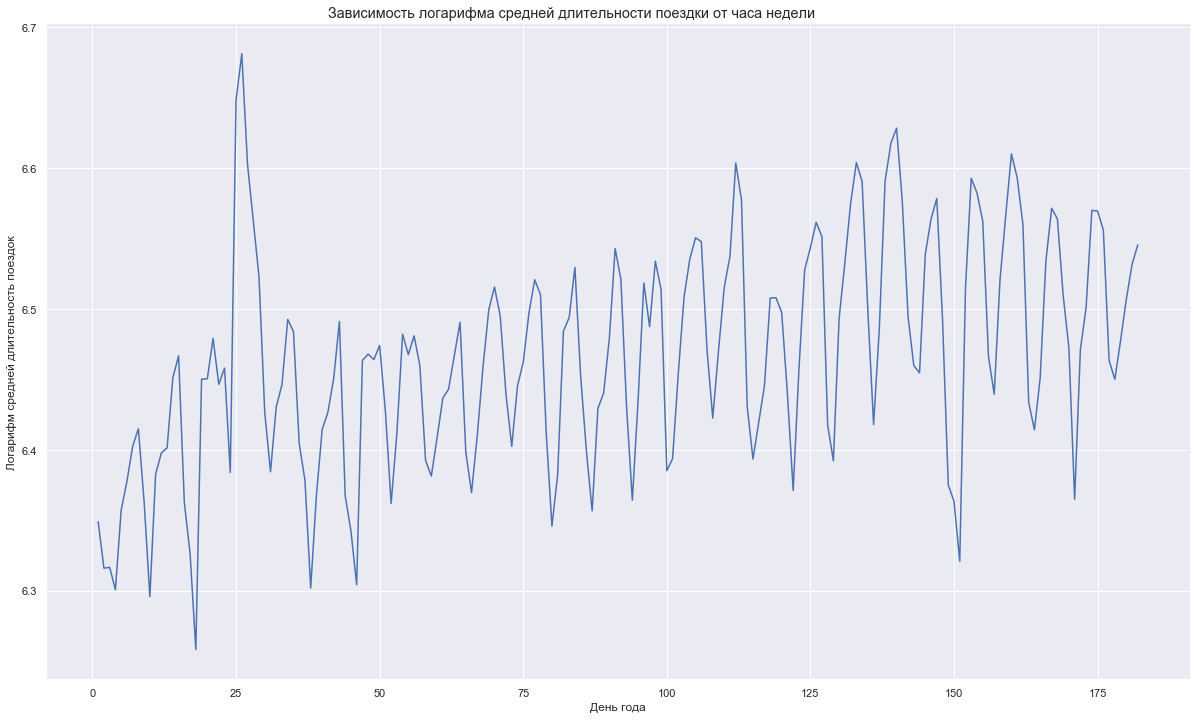

In [25]:
data["day_num"] = data["pickup_datetime"].dt.dayofyear
date_groups = data.groupby("day_num").mean()["trip_duration_log"]
date_groups
gr = sns.relplot(data=date_groups, kind="line").set_axis_labels("День года", "Логарифм средней длительность поездок")
gr.fig.set_size_inches(18.5, 10.5)
gr.fig.suptitle("Зависимость логарифма средней длительности поездки от часа недели")

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:**: Графики зависимости таргета и количества поездок от дня недели, от часа в определенной степени и от дня в году в целом довольно близки. 

Объясняется это тем, что, вероятно, в Нью-Йорке есть выделенные полосы такси, чем больше такси выполняют заказы, тем больше нагружены эти полосы, и тем дольше необходимо затратить время на выполнение каждого заказа.

Исключением являются два аномальных периода, в них графики ведут себя по разному. Объясняется это тем, что поездок в те периоды мало и они, очевидно, необычные. Следовательно и данные вполне могут иметь другие тренды.

На графике зависимости таргета от дня в году наблюдается тренд на увеличение длительности поездки по мере прошествия года. 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = data_initial
data['trip_duration_log'] = np.log1p(data['trip_duration'])
data.loc[:, 'day_of_week']= data['pickup_datetime'].dt.day_name()
data.loc[:, 'day_of_week_num']= data['pickup_datetime'].dt.weekday

data.loc[:, 'month'] = data['pickup_datetime'].dt.month_name()

data.loc[:, 'hour']= data['pickup_datetime'].dt.hour

data.loc[:, "day_num"] = data["pickup_datetime"].dt.dayofyear

data.loc[:, 'abnormal_1'] = False
abnormal_1_loc = (data['pickup_datetime'] >= pd.to_datetime('2016-01-23')) & (data['pickup_datetime'] <= pd.to_datetime('2016-01-25'))                               
data.loc[abnormal_1_loc,'abnormal_1'] = True

data.loc[:, 'abnormal_2'] = False
abnormal_2_loc = (data['pickup_datetime'] >= pd.to_datetime('2016-05-29')) & (data['pickup_datetime'] <= pd.to_datetime('2016-05-30'))                                 
data.loc[abnormal_2_loc,'abnormal_2'] = True

data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_week,day_of_week_num,month,hour,day_num,abnormal_1,abnormal_2
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,Monday,0,March,17,74,False,False
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,Sunday,6,June,0,164,False,False
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,Tuesday,1,January,11,19,False,False
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,Wednesday,2,April,19,97,False,False
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,Saturday,5,March,13,86,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,Friday,4,April,13,99,False,False
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,Sunday,6,January,7,10,False,False
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,Friday,4,April,6,113,False,False
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,Tuesday,1,January,15,5,False,False


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:**
Все признаки, которые мы добавили, необходимо отнести к категориальным. Они все следуют из pickup_datetime, мы можем, к примеру, группировать данные в зависимости от значения этих признаков, анализировать и сравнивать эти группы, но не можем производить с ними арифметических действий. Кроме того, учитывая ранее выявленный тренд в зависиомости дня в году и таргета, можно сказать, что признак day_num является порядковым признаком.



**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

X = data[['day_of_week', 'day_num', 'month', 'hour', 'abnormal_1', 'abnormal_2']]
y = data[['trip_duration_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


categorical_features = ['day_num', 'day_of_week',  'month', 'hour']
numeric_features = []

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.7882
RMSLE для тестовой выборки = 0.7865
RMSLE для среднего (константа) = 0.7958


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [28]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [29]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [30]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ:** Явно выделяющиеся точки - аэропорты.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data.loc[:, 'haversine'] = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_week,day_of_week_num,month,hour,day_num,abnormal_1,abnormal_2,haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,Monday,0,March,17,74,False,False,1.498521
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,Sunday,6,June,0,164,False,False,1.805507
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,Tuesday,1,January,11,19,False,False,6.385098
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,Wednesday,2,April,19,97,False,False,1.485498
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,Saturday,5,March,13,86,False,False,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,Friday,4,April,13,99,False,False,1.225080
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,Sunday,6,January,7,10,False,False,6.049836
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,Friday,4,April,6,113,False,False,7.824606
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,Tuesday,1,January,15,5,False,False,1.092564


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.loc[:, 'haversine_log'] = np.log1p(data['haversine'])
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_week,day_of_week_num,month,hour,day_num,abnormal_1,abnormal_2,haversine,haversine_log
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,Monday,0,March,17,74,False,False,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,Sunday,6,June,0,164,False,False,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,Tuesday,1,January,11,19,False,False,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,Wednesday,2,April,19,97,False,False,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,Saturday,5,March,13,86,False,False,1.188588,0.783257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,Friday,4,April,13,99,False,False,1.225080,0.799793
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,Sunday,6,January,7,10,False,False,6.049836,1.953004
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,Friday,4,April,6,113,False,False,7.824606,2.177544
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,Tuesday,1,January,15,5,False,False,1.092564,0.738390


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlation_havenrsine = data['haversine'].corr(data['trip_duration_log'])
correlation_havenrsine_log = data['haversine_log'].corr(data['trip_duration_log'])
print("Корреляция для расстояния haversine: " + str(correlation_havenrsine))
print("Корреляция для логарифма расстояния haversine: " + str(correlation_havenrsine_log))


Корреляция для расстояния haversine: 0.573594831118015
Корреляция для логарифма расстояния haversine: 0.749882237394248


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Скорость (км/с)'),
 Text(0.5, 1.0, 'Распределение средней скорости')]

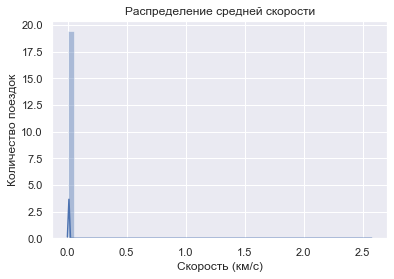

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['average_speed'] = data['haversine'] / data['trip_duration']
gr = sns.distplot(data['average_speed'])
gr.set(xlabel='Скорость (км/с)', ylabel='Количество поездок', title="Распределение средней скорости")

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Скорость (км/с)'),
 Text(0.5, 1.0, 'Распределение средней скорости')]

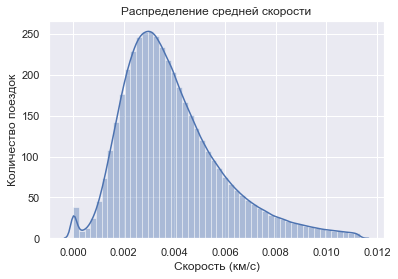

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
quantile = np.quantile(data["average_speed"], 0.99)
data = data.loc[data["average_speed"] < quantile]
gr = sns.distplot(data["average_speed"])
gr.set(xlabel='Скорость (км/с)', ylabel='Количество поездок', title='Распределение средней скорости')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

[Text(30.5, 0.5, 'День недели'),
 Text(0.5, 12.5, 'Час'),
 Text(0.5, 1, 'Тепловая карта для средней скорости по дням и часам')]

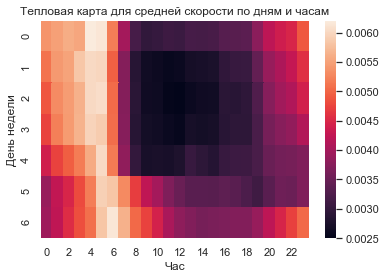

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_hour_pairs = data.groupby(by=["day_of_week_num","hour"]).median()
day_hour_pairs = day_hour_pairs['average_speed'].reset_index().pivot(index="day_of_week_num", columns="hour", values="average_speed")
day_hour_pairs 
gr = sns.heatmap(data = day_hour_pairs)
gr.set(xlabel='Час', ylabel='День недели', title="Тепловая карта для средней скорости по дням и часам")

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Скорость найдена с учетом значения таргета, очевидно, что из-за этого её нельзя использовать для обучения модели, предсказывающей таргет

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = data.drop("average_speed", axis=1)
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,day_of_week,day_of_week_num,month,hour,day_num,abnormal_1,abnormal_2,haversine,haversine_log
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,Monday,0,March,17,74,False,False,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,Sunday,6,June,0,164,False,False,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,Tuesday,1,January,11,19,False,False,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,Wednesday,2,April,19,97,False,False,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,Saturday,5,March,13,86,False,False,1.188588,0.783257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,Friday,4,April,13,99,False,False,1.225080,0.799793
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,Sunday,6,January,7,10,False,False,6.049836,1.953004
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,Friday,4,April,6,113,False,False,7.824606,2.177544
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,Tuesday,1,January,15,5,False,False,1.092564,0.738390


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ:** 

- Скорость максимальна ранним утром: в выходные с 5 до 6 часов утра, в будние с 4 до 5
- Скорость минимальна: в выходные с 12 до 18, в будние с 7 до 18



Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [38]:
data.loc[:, "fastest_period"] = False
fastest_loc = (data["day_of_week_num"] < 5) & (data["hour"] >= 4) & (data["hour"] <= 5)
fastest_loc_weekends = (data["day_of_week_num"] >= 5) & (data["hour"] >= 5) & (data["hour"] <= 6)
data.loc[fastest_loc | fastest_loc_weekends, "fastest_period"] = True
slowest_loc = (data["day_of_week_num"] < 5) & (data["hour"] >= 7) & (data["hour"] <= 18)
slowest_loc_weekends = (data["day_of_week_num"] >= 5) & (data["hour"] >= 12) & (data["hour"] <= 18)
data.loc[:, "slowest_period"] = False
data.loc[slowest_loc | slowest_loc_weekends, "slowest_period"] = True
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,day_of_week_num,month,hour,day_num,abnormal_1,abnormal_2,haversine,haversine_log,fastest_period,slowest_period
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0,March,17,74,False,False,1.498521,0.915699,False,True
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,6,June,0,164,False,False,1.805507,1.031584,False,False
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,1,January,11,19,False,False,6.385098,1.999464,False,True
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,2,April,19,97,False,False,1.485498,0.910473,False,False
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,5,March,13,86,False,False,1.188588,0.783257,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,...,4,April,13,99,False,False,1.225080,0.799793,False,True
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,...,6,January,7,10,False,False,6.049836,1.953004,False,False
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,...,4,April,6,113,False,False,7.824606,2.177544,False,False
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,...,1,January,15,5,False,False,1.092564,0.738390,False,True


**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
JFK_first_long =  -73.82
JFK_first_lat = 40.66

JFK_second_long = -73.78
JFK_second_lat = 40.63

LGA_first_long = -73.88
LGA_first_lat = 40.78

LGA_second_long = -73.865
LGA_second_lat = 40.767

data['from_LGA_airport'] = False
data['to_LGA_airport'] = False
data['to_JFK_airport'] = False
data['from_JFK_airport'] = False

JFK_loc_pickup = (data['pickup_longitude'] >= JFK_first_long) & (data['pickup_longitude'] <= JFK_second_long) & (data['pickup_latitude'] <= JFK_first_lat) & (data['pickup_latitude'] >= JFK_second_lat)
JFK_loc_dropoff = (data['dropoff_longitude'] >= JFK_first_long) & (data['dropoff_longitude'] <= JFK_second_long) & (data['dropoff_latitude'] <= JFK_first_lat) & (data['dropoff_latitude'] >= JFK_second_lat)
LGA_loc_pickup = (data['pickup_longitude'] >= LGA_first_long) & (data['pickup_longitude'] <= LGA_second_long) & (data['pickup_latitude'] <= LGA_first_lat) & (data['pickup_latitude'] >= LGA_second_lat)
LGA_loc_dropoff = (data['dropoff_longitude'] >= LGA_first_long) & (data['dropoff_longitude'] <= LGA_second_long) & (data['dropoff_latitude'] <= LGA_first_lat) & (data['dropoff_latitude'] >= LGA_second_lat)

data.loc[JFK_loc_pickup, "from_JFK_airport"] = True
data.loc[JFK_loc_dropoff, "to_JFK_airport"] = True
data.loc[LGA_loc_pickup, "from_LGA_airport"] = True
data.loc[LGA_loc_dropoff, "to_LGA_airport"] = True

print(data.loc[data["from_JFK_airport"] == True].shape)
print(data.loc[data["to_JFK_airport"] == True].shape)
print(data.loc[data["from_LGA_airport"] == True].shape)
print(data.loc[data["to_LGA_airport"] == True].shape)

(22520, 26)
(8792, 26)
(19703, 26)
(11662, 26)


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'В аэропорт Кеннеди?'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от признака')]

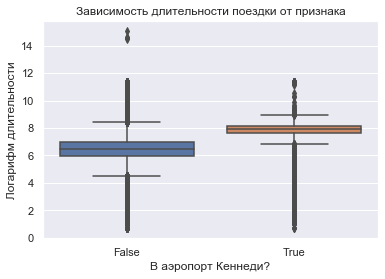

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(data=data, x='to_JFK_airport', y='trip_duration_log').set(xlabel="В аэропорт Кеннеди?", ylabel='Логарифм длительности', title="Зависимость длительности поездки от признака")

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'Из аэропорта Кеннеди?'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от признака')]

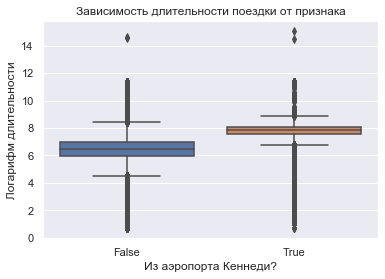

In [41]:
sns.boxplot(data=data, x='from_JFK_airport', y='trip_duration_log').set(xlabel="Из аэропорта Кеннеди?", ylabel='Логарифм длительности', title="Зависимость длительности поездки от признака")

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'В аэропорт Ле-Гвардия?'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от признака')]

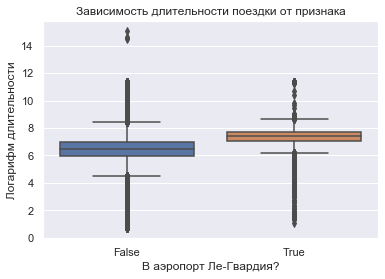

In [42]:
sns.boxplot(data=data, x='from_LGA_airport', y='trip_duration_log').set(xlabel="В аэропорт Ле-Гвардия?", ylabel='Логарифм длительности', title="Зависимость длительности поездки от признака")

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'Из аэропорта Ле-Гвардия?'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от признака')]

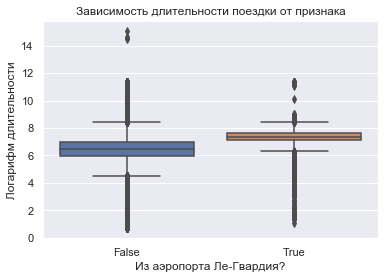

In [43]:
sns.boxplot(data=data, x='to_LGA_airport', y='trip_duration_log').set(xlabel="Из аэропорта Ле-Гвардия?", ylabel='Логарифм длительности', title="Зависимость длительности поездки от признака")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: исходя из графиков, лицезреем очевидный факт: основная масса поездок из или в аэропорт ощутимо дольше остальных, при этом поездки до и из аэропорта имени Кеннеди в среднем дольше поездок из Ле-Гвардии, потому признаки точно стоит использовать при обучении модели 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [44]:
# за основу взято решение https://ru.stackoverflow.com/a/1161988

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial.distance import cdist


class MapGridTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, loc, col, row):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.pick_lat = "pickup_latitude"
        self.pick_lon = "pickup_longitude"
        self.drop_lat = "dropoff_latitude"
        self.drop_lon = "dropoff_longitude"
        self.lat_min = loc[:, 0].min()
        self.lat_max = loc[:, 0].max()
        self.lon_min = loc[:, 1].min()
        self.lon_max = loc[:, 1].max()
    
    def fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.circles_loc
    
    def get_sector_idx(self, X):
        self.circles_loc = self.fit()
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                      self.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                      self.circles_loc).argmin(axis=1)
        invalid_pickup_loc = (X[self.pick_lat] > self.lat_max) | (X[self.pick_lat] < self.lat_min) | (X[self.pick_lon] > self.lon_max) | (X[self.pick_lon] < self.lon_min)
        pickup_idx[invalid_pickup_loc] = -1
        
        invalid_dropoff_loc = (X[self.drop_lat] > self.lat_max) | (X[self.drop_lat] < self.lat_min) | (X[self.drop_lon] > self.lon_max) | (X[self.drop_lon] < self.lon_min)
        dropoff_idx[invalid_dropoff_loc] = -1
        return pickup_idx, dropoff_idx

    def transform(self, X):
        pickup_idx, dropoff_idx = self.get_sector_idx(X)
        pickup_area = pd.Series(pickup_idx, name='pickup_position').reindex(X.index)
        dropoff_area = pd.Series(dropoff_idx, name='dropoff_position').reindex(X.index)
        pickup_area = pickup_area.dropna(axis=0)
        dropoff_area = dropoff_area.dropna(axis=0)
        output = pd.concat([X, pickup_area, dropoff_area], axis=1)
        output = output.fillna(-1)
        return output

initial_location = np.array([
              [40.70, -74.01],
              [40.703, -73.934],
              [40.791, -73.934],
              [40.791, -74.018]
               ])

transformer = MapGridTransformer(loc=initial_location, col=4, row=4)    
data = transformer.transform(data)

In [45]:
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,haversine_log,fastest_period,slowest_period,from_LGA_airport,to_LGA_airport,to_JFK_airport,from_JFK_airport,pickup_position,dropoff_position
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,1.498521,0.915699,False,True,False,False,False,False,9.0,10.0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,1.805507,1.031584,False,False,False,False,False,False,5.0,4.0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,6.385098,1.999464,False,True,False,False,False,False,9.0,0.0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,1.485498,0.910473,False,False,False,False,False,False,0.0,0.0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,1.188588,0.783257,False,True,False,False,False,False,-1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,...,1.225080,0.799793,False,True,False,False,False,False,-1.0,-1.0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,...,6.049836,1.953004,False,False,False,False,False,False,-1.0,-1.0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,...,7.824606,2.177544,False,False,False,False,False,False,-1.0,-1.0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,...,1.092564,0.738390,False,True,False,False,False,False,-1.0,-1.0


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X = data[['day_of_week', 'day_num', 'month', 'hour', 'abnormal_1', 'abnormal_2', "slowest_period", "fastest_period", "haversine_log", "to_LGA_airport", "from_LGA_airport", "to_JFK_airport", "from_JFK_airport", "pickup_position", "dropoff_position"]]
y = data[['trip_duration_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


categorical_features = ['day_num', 'day_of_week',  'month', 'hour', "dropoff_position", "pickup_position"]
numeric_features = ["haversine_log"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.4910
RMSLE для тестовой выборки = 0.4926
RMSLE для среднего (константа) = 0.7958


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
factors = ["passenger_count", "store_and_fwd_flag", "vendor_id"]
for factor in factors:
    print("Уникальных значений для фактора " + factor + ":")
    print(data[factor].value_counts())
    print("Их количество: " + str(data[factor].value_counts().shape[0]) + '\n')

Уникальных значений для фактора passenger_count:
1    1023159
2     208259
5      77260
3      59343
6      47846
4      28128
0         58
7          3
9          1
Name: passenger_count, dtype: int64
Их количество: 9

Уникальных значений для фактора store_and_fwd_flag:
N    1436133
Y       7924
Name: store_and_fwd_flag, dtype: int64
Их количество: 2

Уникальных значений для фактора vendor_id:
2    772196
1    671861
Name: vendor_id, dtype: int64
Их количество: 2



Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
factors.append("trip_duration_log")
other_features_data = data[factors]


[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'Количество пассажиров'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от количества пассажиров')]

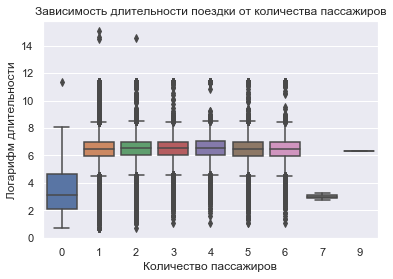

In [49]:
sns.boxplot(data=other_features_data, x='passenger_count', y='trip_duration_log').set(xlabel="Количество пассажиров", ylabel='Логарифм длительности', title="Зависимость длительности поездки от количества пассажиров")

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'Идентификатор вендора'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от вендора')]

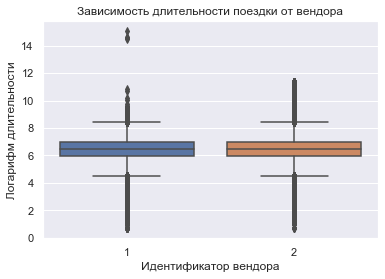

In [50]:
sns.boxplot(data=other_features_data, x='vendor_id', y='trip_duration_log').set(xlabel="Идентификатор вендора", ylabel='Логарифм длительности', title="Зависимость длительности поездки от вендора")

[Text(0, 0.5, 'Логарифм длительности'),
 Text(0.5, 0, 'Значение флага'),
 Text(0.5, 1.0, 'Зависимость длительности поездки от значеня флага')]

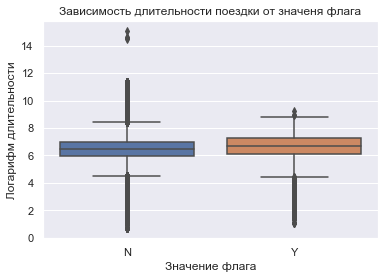

In [51]:
sns.boxplot(data=other_features_data, x='store_and_fwd_flag', y='trip_duration_log').set(xlabel="Значение флага", ylabel='Логарифм длительности', title="Зависимость длительности поездки от значеня флага")

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.loc[data['vendor_id'] == 1.0, 'vendor_id'] = 0
data.loc[data['vendor_id'] == 2.0, 'vendor_id'] = 1

data.loc[data['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
data.loc[data['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Исходя из графиков, скорее всего, эти признаки будут крайне слабо влиять на таргет. Видно, что кардинальных отличий в значениях таргета между подвыборками с различными и значениями флага не наблюдается, разница есть только в выбросах. Для количества пассажиров разница наблюдается только при нестандартно большом и нулевом количестве, и таких наблюдений вновь крайне мало. Вполне вероятно, использование количества пассажиров в качестве незначительно улучшит ошибку на тестовой выборке, но не прибавит ей адекватности.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X = data[['day_of_week', 'day_num', 'month', 'hour', 'abnormal_1', 'abnormal_2', "slowest_period", "fastest_period", "haversine_log", "to_LGA_airport", "from_LGA_airport", 
          "to_JFK_airport", "from_JFK_airport", "pickup_position", "dropoff_position", 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
y = data[['trip_duration_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


categorical_features = ['day_num', 'day_of_week',  'month', 'hour', "dropoff_position", "pickup_position", 'passenger_count']
numeric_features = ["haversine_log"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)


RMSLE для обучающей выборки = 0.4907
RMSLE для тестовой выборки = 0.4923
RMSLE для среднего (константа) = 0.7958


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Очищать от выбросов будем при помощи квантилей уровня 0.01 и 0.99. Для начала поработаем с длительностью

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Длительность поездки'),
 Text(0.5, 1.0, 'Распределение длительности поездки')]

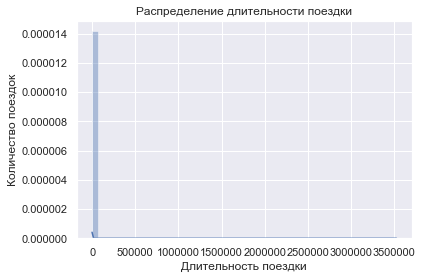

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
train, test = train_test_split(data, test_size=0.3, random_state=10)
gr = sns.distplot(train["trip_duration"])
gr.set(xlabel='Длительность поездки', ylabel='Количество поездок', title='Распределение длительности поездки')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Длительность поездки'),
 Text(0.5, 1.0, 'Распределение длительности поездки')]

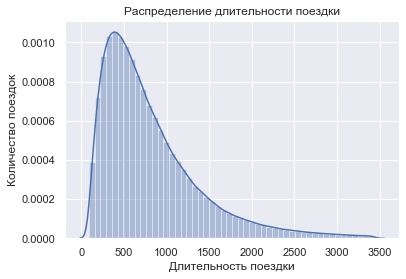

In [55]:
top_quantile = np.quantile(train["trip_duration"], 0.99)
bot_quantile = np.quantile(train["trip_duration"], 0.01)
train = train.loc[(train['trip_duration'] > bot_quantile) & (train['trip_duration'] < top_quantile)]
gr = sns.distplot(train["trip_duration"])
gr.set(xlabel='Длительность поездки', ylabel='Количество поездок', title='Распределение длительности поездки')

Теперь работаем с расстоянием:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Расстояние'),
 Text(0.5, 1.0, 'Распределение расстояния поездок')]

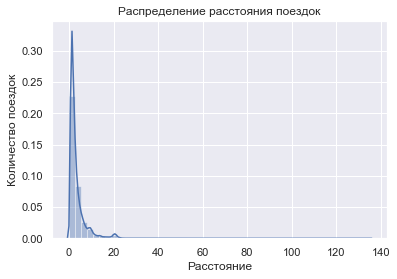

In [60]:
gr = sns.distplot(train["haversine"])
gr.set(xlabel='Расстояние', ylabel='Количество поездок', title='Распределение расстояния поездок')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Расстояние'),
 Text(0.5, 1.0, 'Распределение расстояния поездок')]

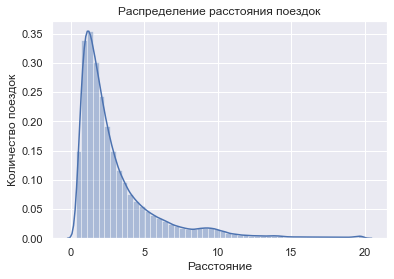

In [56]:
top_quantile = np.quantile(train["haversine"], 0.99)
bot_quantile = np.quantile(train["haversine"], 0.01)
train = train.loc[(train['haversine'] > bot_quantile) & (train['haversine'] < top_quantile)]
gr = sns.distplot(train["haversine"])
gr.set(xlabel='Расстояние', ylabel='Количество поездок', title='Распределение расстояния поездок')

Теперь работаем с остатками регресии, для этого прогоним текущую тестовую выборку по модели:

In [62]:
model1 = pipeline.fit(train[X.columns], train[y.columns])
y_pred_train1 = model1.predict(train[X.columns])

(970639, 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество поездок'),
 Text(0.5, 0, 'Остаток'),
 Text(0.5, 1.0, 'Распределение остатков')]

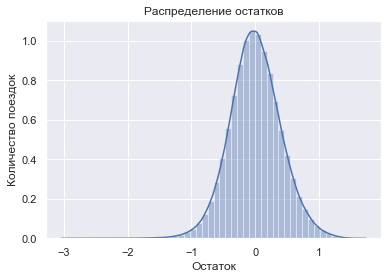

In [69]:
train["error"] = y_pred_train1 - train[y.columns]
gr = sns.distplot(train["error"])
gr.set(xlabel='Остаток', ylabel='Количество поездок', title='Распределение остатков')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(951225, 29)


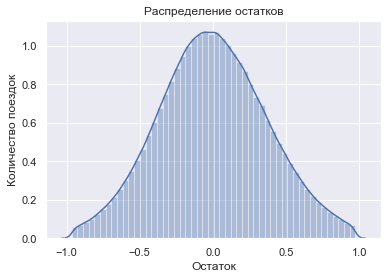

In [71]:
top_quantile = np.quantile(error, 0.99)
bot_quantile = np.quantile(error, 0.01)
train = train.loc[(train['error'] > bot_quantile) & (train['error'] < top_quantile)]
gr = sns.distplot(train["error"])
gr.set(xlabel='Остаток', ylabel='Количество поездок', title='Распределение остатков')
print(train.shape)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for cat_feature in categorical_features:
    print(cat_feature)
    print(train[cat_feature].value_counts())
    print()

day_num
100    6367
65     6354
107    6279
58     6129
106    6101
       ... 
3      4062
25     3864
151    3580
24     2187
23     1103
Name: day_num, Length: 182, dtype: int64

day_of_week
Friday       146074
Saturday     144205
Thursday     142093
Wednesday    137340
Tuesday      132431
Sunday       126797
Monday       122285
Name: day_of_week, dtype: int64

month
March       167647
April       164392
May         161011
February    156226
June        151974
January     149975
Name: month, dtype: int64

hour
19    59943
18    59693
21    55756
20    55524
22    52988
17    49454
14    47888
12    47004
13    46439
15    46100
23    45893
11    44725
9     44217
8     44103
10    42754
16    40774
7     36298
0     34587
1     25128
6     21438
2     18309
3     13593
4      9639
5      8978
Name: hour, dtype: int64

dropoff_position
 9.0     187009
-1.0     152798
 5.0     122763
 10.0    116384
 14.0     70841
 4.0      65924
 13.0     54573
 0.0      52721
 15.0     49100
 8.0  

Как видно, редкие категории есть только в факторах dropoff_position и pickup_position. Логично будет объединить зоны с номерам 3 7 и 12

In [75]:
pickup_pos_loc = (train["pickup_position"] == 3.0) | (train["pickup_position"] == 7.0) | (train["pickup_position"] == 12.0)
train.loc[pickup_pos_loc, "pickup_position"] = 17

pickup_pos_loc = (train["dropoff_position"] == 3.0) | (train["dropoff_position"] == 7.0) | (train["dropoff_position"] == 12.0)
train.loc[pickup_pos_loc, "dropoff_position"] = 17

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [76]:
model2 = pipeline.fit(train[X.columns], train[y.columns])
y_pred_train = model.predict(train[X.columns])
y_pred_test = model.predict(test[X.columns])
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(train[y.columns], y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(test[y.columns], y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.3690
RMSLE для тестовой выборки = 0.4925
RMSLE для среднего (константа) = 0.7958


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [91]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
])
column_transformer.fit(data[categorical_features])
encoded_data = column_transformer.transform(data[categorical_features])
print("Признаков до one-hot encoding: " + str(data.shape[1]))
print("Признаков посе one-hot encoding: " + str(encoded_data.shape[1]))

Признаков до one-hot encoding: 28
Признаков посе one-hot encoding: 262


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

X = data[['day_of_week', 'day_num', 'month', 'hour', 'abnormal_1', 'abnormal_2', "slowest_period", "fastest_period", "haversine_log", "to_LGA_airport", "from_LGA_airport", 
          "to_JFK_airport", "from_JFK_airport", "pickup_position", "dropoff_position", 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
y = data[['trip_duration_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model_lasso = pipeline_lasso.fit(X_train, y_train)
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.7905
RMSLE для тестовой выборки = 0.7923
RMSLE для среднего (константа) = 0.7958


Ридж - регрессия оказалась гораздо лучше, Лассо дала ошибку, близкую к константной модели

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

Best alpha = 0.0010


Text(0.5, 1.0, 'Поиск alpha для Lasso регрессии')

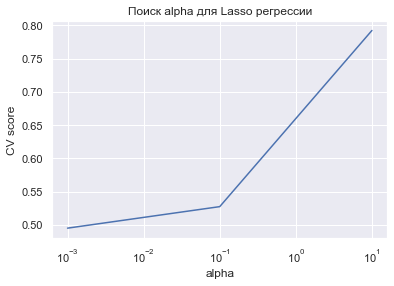

In [122]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

train, validation = train_test_split(data, test_size=0.2, random_state=10)

model_lasso = pipeline_lasso.fit(train[X.columns], train[y.columns])

alphas = np.logspace(-3, 1, 3)
searcher = GridSearchCV(model_lasso, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(validation[X.columns], validation[y.columns])

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.title("Поиск alpha для Lasso регрессии")

In [123]:
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])
model_lasso = lasso_pipeline.fit(train[X.columns], train[y.columns])
y_pred_train = model_lasso.predict(train[X.columns])
y_pred_test = model_lasso.predict(validation[X.columns])
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(train[y.columns], y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(validation[y.columns], y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.7833
RMSLE для тестовой выборки = 0.7850
RMSLE для среднего (константа) = 0.7958


Ошибка улучшилась незначительно

Best alpha = 0.0010


Text(0, 0.5, 'CV score')

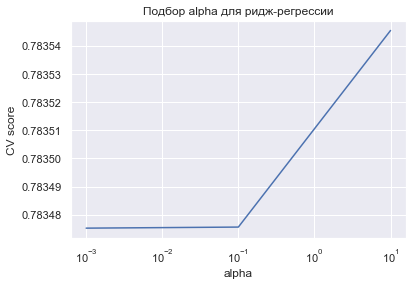

In [126]:
ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
X_train = train[X.columns]
y_train = train[y.columns]
X_val = validation[X.columns]
y_val = validation[y.columns]

ridge_model = ridge_pipeline.fit(X_train, y_train)
alphas = np.logspace(-3, 1, 3)

searcher = GridSearchCV(ridge_model, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.title('Подбор alpha для ридж-регрессии')
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [127]:
ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])
model_ridge = ridge_pipeline.fit(train[X.columns], train[y.columns])
y_pred_train = model_ridge.predict(train[X.columns])
y_pred_test = model_ridge.predict(validation[X.columns])
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(train[y.columns], y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(validation[y.columns], y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.7813
RMSLE для тестовой выборки = 0.7833
RMSLE для среднего (константа) = 0.7958


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def create_pipeline(alpha):
    return Pipeline(steps=[('ohe_and_scaling', column_transformer), ('regression', Lasso(alpha))])

temp_dict = {}
for alpha in alphas:
    model = create_pipeline(alpha)
    model.fit(train[X.columns], train[y.columns])
    temp_dict[alpha] = np.sum(model.steps[-1][-1].coef_ == 0)

{0.001: 226,
 0.0027825594022071257: 241,
 0.007742636826811269: 256,
 0.021544346900318832: 261,
 0.05994842503189409: 261,
 0.1668100537200059: 261,
 0.46415888336127775: 261,
 1.2915496650148828: 261,
 3.593813663804626: 261,
 10.0: 261}

Text(0.5, 0.98, 'Зависимость количества зануленных признаков и alpha')

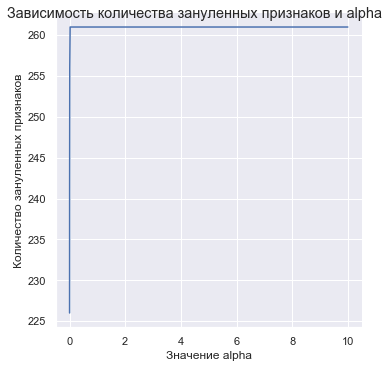

In [133]:
temp_series = pd.Series(temp_dict)
gr = sns.relplot(data=temp_series, kind="line").set_axis_labels("Значение alpha", "Количество зануленных признаков")
gr.fig.suptitle("Зависимость количества зануленных признаков и alpha")

График имеет довольно странный вид, потому что наибольшее значение аргумента слишком велико по сравнению с наименьшим. В целом, очевидно, что чем ближе альфа к нулю, тем больше незануленных весов, при альфе более 0.007 модель теряет смысл 

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: По сути, данный признак определяет некий паттерн поездки - из одного "района" в другой. Очевидно, что в таких ситуациях возможно, что определенные паттерны поездок будут иметь большую длительность, чем другие, поскольку дороги между районами могут быть по-разному загружены.

In [144]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
groups = data.groupby(by=['pickup_position', 'dropoff_position']).size().sort_values(ascending=False).reset_index()
data['position_interactions'] = -1
groups = groups.loc[(groups["pickup_position"] != -1) & (groups["dropoff_position"] != -1)]
for index, group in groups.head(100).iterrows():
    data.loc[(data["pickup_position"] == group["pickup_position"]) & (data["dropoff_position"] == group["dropoff_position"]), "position_interactions"] = index


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine_log,fastest_period,slowest_period,from_LGA_airport,to_LGA_airport,to_JFK_airport,from_JFK_airport,pickup_position,dropoff_position,position_interactions
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,455,...,0.915699,False,True,False,False,False,False,9.0,10.0,4
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,663,...,1.031584,False,False,False,False,False,False,5.0,4.0,9
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,...,1.999464,False,True,False,False,False,False,9.0,0.0,30
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,429,...,0.910473,False,False,False,False,False,False,0.0,0.0,25
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,435,...,0.783257,False,True,False,False,False,False,-1.0,14.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,778,...,0.799793,False,True,False,False,False,False,-1.0,-1.0,-1
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,655,...,1.953004,False,False,False,False,False,False,-1.0,-1.0,-1
1458641,id2304944,1,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,764,...,2.177544,False,False,False,False,False,False,-1.0,-1.0,-1
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,373,...,0.738390,False,True,False,False,False,False,-1.0,-1.0,-1


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [145]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = data[['day_of_week', 'day_num', 'month', 'hour', 'abnormal_1', 'abnormal_2', "slowest_period", "fastest_period", "haversine_log", "to_LGA_airport", "from_LGA_airport", 
          "to_JFK_airport", "from_JFK_airport", "pickup_position", "dropoff_position", 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'position_interactions']]
y = data[['trip_duration_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


categorical_features = ['day_num', 'day_of_week',  'month', 'hour', "dropoff_position", "pickup_position", 'passenger_count', 'position_interactions']
numeric_features = ["haversine_log"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("RMSLE для обучающей выборки = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSLE для тестовой выборки = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("RMSLE для среднего (константа) = %.4f" % rmsle)

RMSLE для обучающей выборки = 0.4907
RMSLE для тестовой выборки = 0.4923
RMSLE для среднего (константа) = 0.7958


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

![title](https://i.ibb.co/0fFKPv8/unnamed.png)